<div style="background: linear-gradient(to right, #FFE680, #FFD700, #FFC000); padding: 20px; border-radius: 10px; 
            font-size: 20px; font-family: 'Times New Roman'; text-align: center;">
  <h1 style="color: black;"><strong>Summer Olympic Medallists 1896-2008</strong></h1>
</div>

<img src="olympic.jpg" class="img-fluid" alt="Sales Interior View">

<div style="background: linear-gradient(to right, #E5E5E5, #F2F2F2, #D9D9D9); padding: 20px; border-radius: 10px; 
            font-size: 20px; font-family: 'Times New Roman'; text-align: center;">
  <h1 style="color: black;"><strong>Exploring Data</strong></h1>
</div>

<h1 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>Import Required Libraries</strong></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["font.family"] = "Times New Roman"
sns.set_palette("Set2")
pd.set_option("display.max_columns", None)

<h1 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>Load the Dataset</strong></h1>

In [2]:
file_path = "D:\\Jason\\Python\\Summer_Olympic_Medallists\\Summer_Olympic_medallists_1896-2008.xlsx"
olympic_data = pd.read_excel(file_path)

In [3]:
olympic_data

,Row_id,City,Edition,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_gender,Medal,Count of medals
0,1,Athens,1896,Aquatics,Swimming,Alfred hajos,HUN,Men,100m freestyle,M,Gold,1
1,2,Athens,1896,Aquatics,Swimming,Otto herschmann,AUT,Men,100m freestyle,M,Silver,1
2,3,Athens,1896,Aquatics,Swimming,Dimitrios drivas,GRE,Men,100m freestyle for sailors,M,Bronze,1
3,4,Athens,1896,Aquatics,Swimming,Ioannis malokinis,GRE,Men,100m freestyle for sailors,M,Gold,1
4,5,Athens,1896,Aquatics,Swimming,Spiridon chasapis,GRE,Men,100m freestyle for sailors,M,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,29212,Beijing,2008,Wrestling,Wrestling Gre-R,Mirko englich,GER,Men,84 - 96kg,M,Silver,1
29212,29213,Beijing,2008,Wrestling,Wrestling Gre-R,Mindaugas mizgaitis,LTU,Men,96 - 120kg,M,Bronze,1
29213,29214,Beijing,2008,Wrestling,Wrestling Gre-R,Yuri patrikeev,ARM,Men,96 - 120kg,M,Bronze,1
29214,29215,Beijing,2008,Wrestling,Wrestling Gre-R,Mijain lopez,CUB,Men,96 - 120kg,M,Gold,1


<h1 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>Data Overview</strong></h1>

In [4]:
olympic_data.shape

(29216, 12)

In [5]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Row_id           29216 non-null  int64 
 1   City             29216 non-null  object
 2   Edition          29216 non-null  int64 
 3   Sport            29216 non-null  object
 4   Discipline       29216 non-null  object
 5   Athlete_Name     29216 non-null  object
 6   NOC              29216 non-null  object
 7   Gender           29216 non-null  object
 8   Event            29216 non-null  object
 9   Event_gender     29216 non-null  object
 10  Medal            29216 non-null  object
 11  Count of medals  29216 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


In [6]:
olympic_data.describe(include="object")

,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_gender,Medal
count,29216,29216,29216,29216,29216,29216,29216,29216,29216
unique,22,42,56,21413,138,2,577,3,3
top,Athens,Aquatics,Athletics,Larisa latynina,USA,Men,football,M,Gold
freq,2149,3828,3448,18,4335,21721,1387,20067,9850


In [7]:
olympic_data.isnull().sum()

Row_id             0
City               0
Edition            0
Sport              0
Discipline         0
Athlete_Name       0
NOC                0
Gender             0
Event              0
Event_gender       0
Medal              0
Count of medals    0
dtype: int64

<h1 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>Create Useful Features</strong></h1>

In [8]:
medal_score = {
    "Gold": 3,
    "Silver": 2,
    "Bronze": 1
}

olympic_data["Medal_Score"] = olympic_data["Medal"].map(medal_score)

In [9]:
olympic_data["Decade"] = (olympic_data["Edition"] // 10) * 10

<h1 style="color: #D9D9D9; text-align: left; font-family: times new roman;"><strong>Exploratory Data Analysis (EDA)</strong></h1>

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>1. Total Medals Over Time</strong></h2>

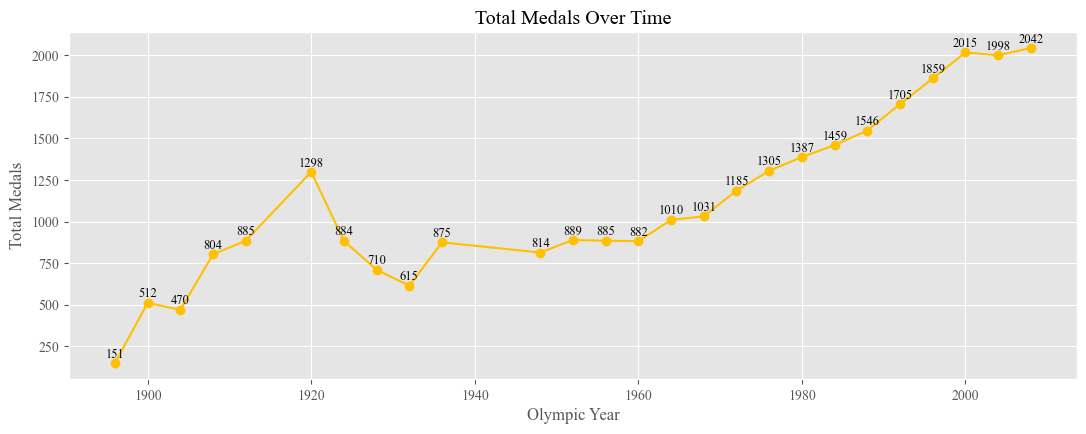

In [10]:
medals_per_year = olympic_data.groupby("Edition").size()

plt.figure(figsize=(13,4.5))
plt.plot(medals_per_year.index, medals_per_year.values, marker='o', color='#FFC000')
for x, y in zip(medals_per_year.index, medals_per_year.values):
    plt.text(x, y + 15, str(y), ha='center', va='bottom', fontsize = 9)
plt.title("Total Medals Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Total Medals")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>2. Top 10 Countries by Total Medals</strong></h2>

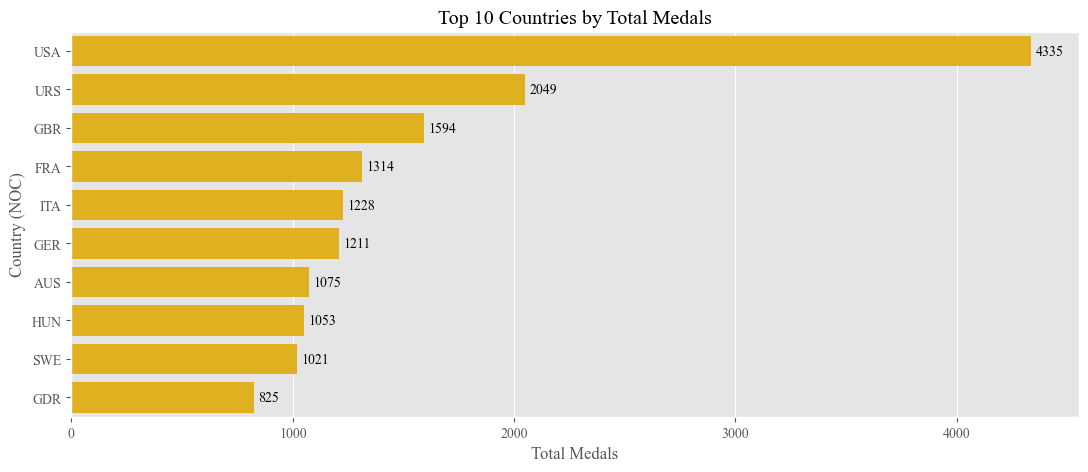

In [11]:
top_countries = olympic_data["NOC"].value_counts().head(10)

plt.figure(figsize=(13,5))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, color='#FFC000')
for i, value in enumerate(top_countries.values):
    ax.text(value + 20, i, str(value), va='center', fontsize=10)
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Total Medals")
plt.ylabel("Country (NOC)")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>3. Medal Distribution</strong></h2>

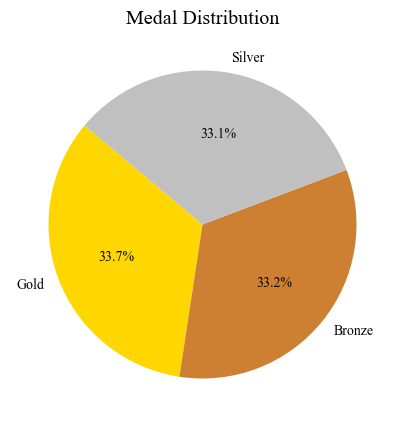

In [12]:
medal_dist = olympic_data["Medal"].value_counts()

colors = ['#FFD700',  '#CD7F32', '#C0C0C0',]
plt.figure(figsize=(5,5))
plt.pie(medal_dist, labels=medal_dist.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Medal Distribution")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>4. Country Performance Over Time (Heatmap)</strong></h2>

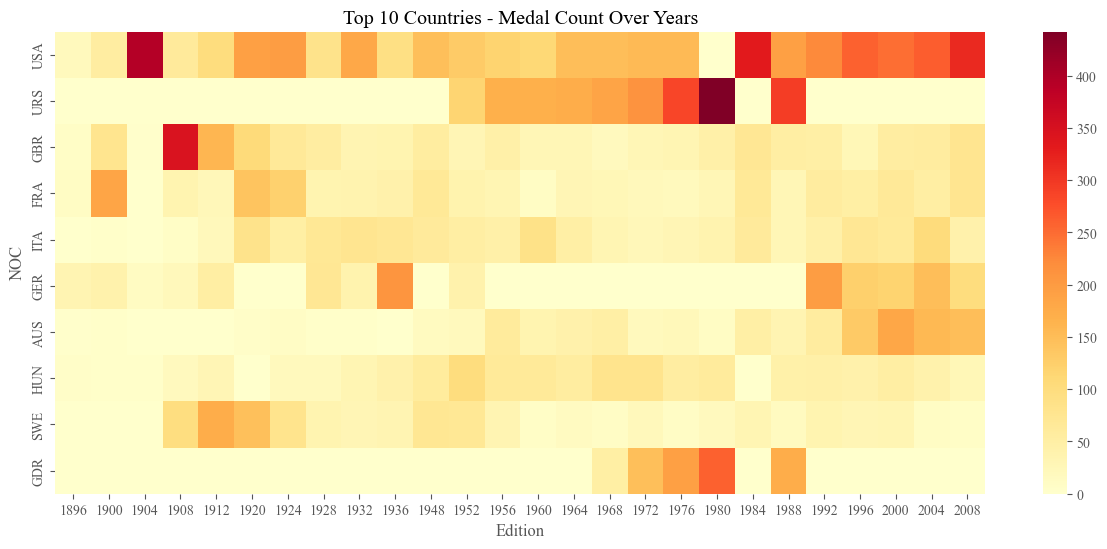

In [13]:
country_year = olympic_data.pivot_table(index="NOC", columns="Edition", values="Medal", aggfunc="count", fill_value=0)

top_10_noc = olympic_data["NOC"].value_counts().head(10).index

plt.figure(figsize=(15,6))
sns.heatmap(country_year.loc[top_10_noc], cmap="YlOrRd")
plt.title("Top 10 Countries - Medal Count Over Years")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong> 5. Top 10 Sports by Medal Count</strong></h2>

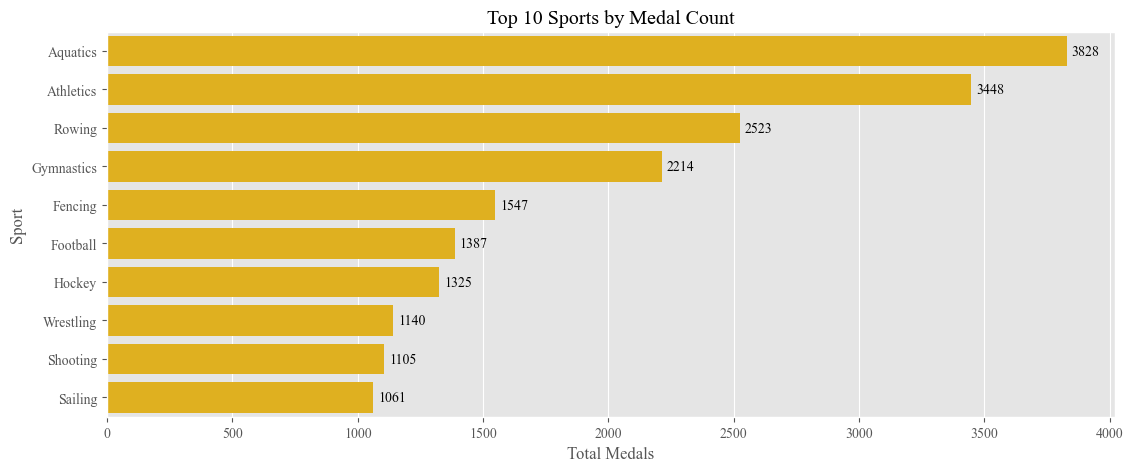

In [14]:
top_sports = olympic_data["Sport"].value_counts().head(10)

plt.figure(figsize=(13,5))
ax = sns.barplot(x=top_sports.values, y=top_sports.index, color='#FFC000')
for i, value in enumerate(top_sports.values):
    ax.text(value + 20, i, str(value), va='center', fontsize=10)
plt.title("Top 10 Sports by Medal Count")
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>6. Most Decorated Athletes</strong></h2>

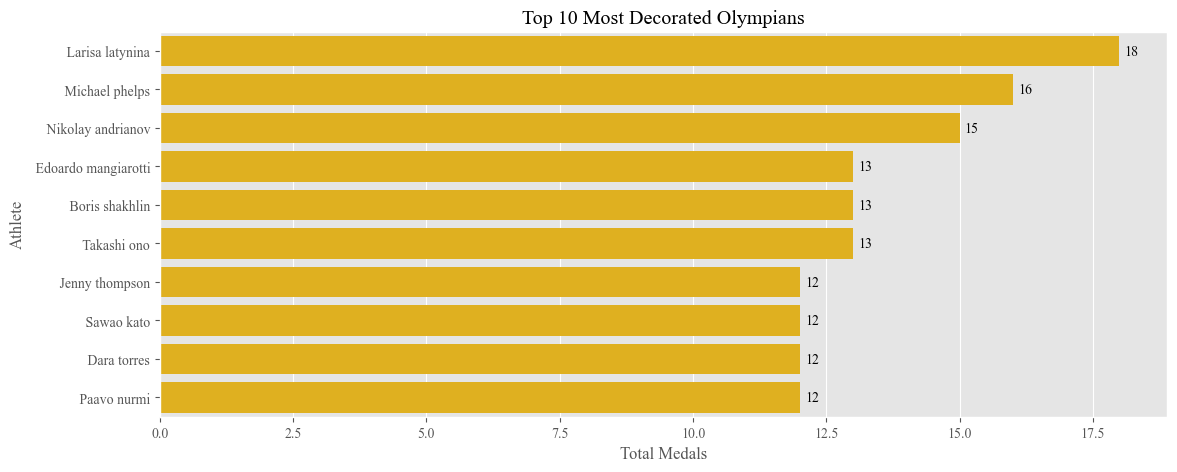

In [15]:
top_athletes = olympic_data["Athlete_Name"].value_counts().head(10)

plt.figure(figsize=(13,5))
ax = sns.barplot(x=top_athletes.values, y=top_athletes.index, color='#FFC000')
for i, value in enumerate(top_athletes.values):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)
plt.title("Top 10 Most Decorated Olympians")
plt.xlabel("Total Medals")
plt.ylabel("Athlete")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>7. Gender Participation Trend</strong></h2>

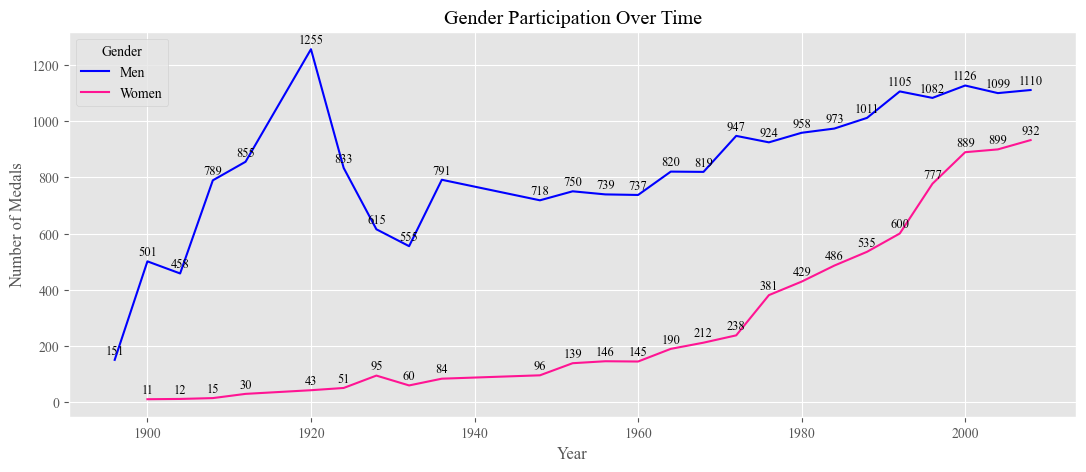

In [16]:
gender_year = olympic_data.groupby(["Edition", "Gender"]).size().unstack()

ax = gender_year.plot(
    figsize=(13,5),
    color={
        "Men": "blue",
        "Women": "#FF1493"
    }
)
for gender in gender_year.columns:
    for x, y in zip(gender_year.index, gender_year[gender]):
        if not pd.isna(y):
            ax.text(x, y + 10, int(y), ha='center', va='bottom', fontsize=9)

plt.title("Gender Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend(title="Gender")
plt.show()

<h2 style="color: #FFC000; text-align: left; font-family: times new roman;"><strong>8. Medal Efficiency (Quality-Based Performance)</strong></h2>

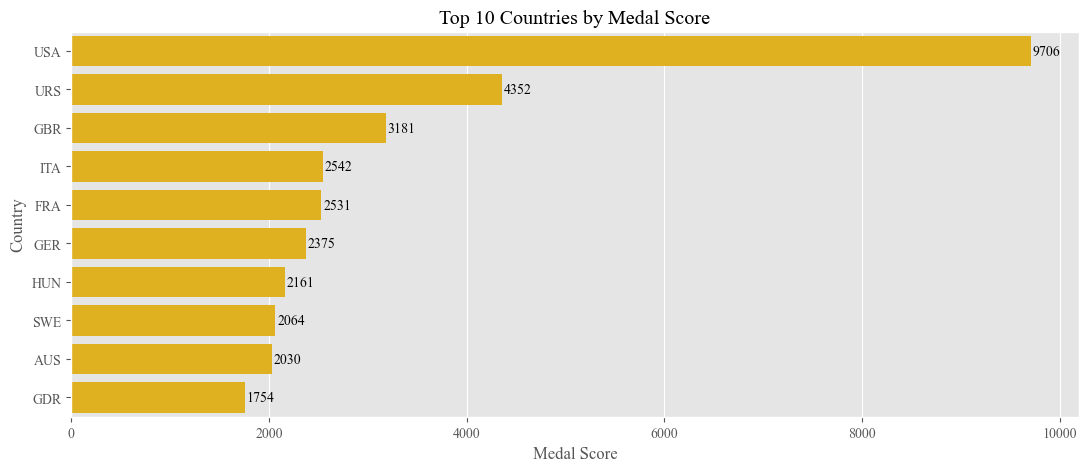

In [17]:
country_efficiency = (
    olympic_data.groupby("NOC")["Medal_Score"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(13,5))
ax = sns.barplot(x=country_efficiency.values, y=country_efficiency.index, color='#FFC000')
for i, value in enumerate(country_efficiency.values):
    ax.text(value + 20, i, str(value), va='center', fontsize=10)
plt.title("Top 10 Countries by Medal Score")
plt.xlabel("Medal Score")
plt.ylabel("Country")
plt.show()

<div style="background: linear-gradient(to right, #E5E5E5, #F2F2F2, #D9D9D9); padding: 20px; border-radius: 10px; 
            font-size: 20px; font-family: 'Times New Roman'; text-align: center;">
  <h1 style="color: black;"><strong>Final Insights</strong></h1>
</div>

<div style="font-family: 'Times New Roman'; text-align: left;">
1. Medal counts increased significantly after 1950 due to more events.<br>
2. USA, USSR, and GER dominate Olympic history.<br>
3. Athletics and Swimming contribute the most medals.<br>
4. Female participation has grown consistently since the 1970s.<br>
5. Some countries perform better in medal quality (gold-heavy) than quantity.
</div>

<div style="background: linear-gradient(to right, #FFE680, #FFD700, #FFC000); padding: 20px; border-radius: 10px; 
            font-size: 20px; font-family: 'Times New Roman'; text-align: center;">
  <h1 style="color: black;"><strong>Conclusion</strong></h1>
</div>

<div style="font-family: 'Times New Roman'; text-align: left;">
This analysis explores historical Olympic medal trends, country dominance,sport specialization, and gender inclusion from 1896 to 2008.<br>
The project demonstrates strong EDA, visualization, and storytelling using Python, Pandas, Matplotlib, and Seaborn.
</div>